In [55]:
import os
os.chdir("..")

In [56]:
from deepsvg.svglib.svg import SVG

from deepsvg import utils
from deepsvg.difflib.tensor import SVGTensor
from deepsvg.svglib.utils import to_gif, make_grid, make_grid_lines, make_grid_grid
from deepsvg.svglib.geom import Bbox
#from deepsvg.svgtensor_dataset import SVGTensorDataset, load_dataset
from deepsvg.svg_dataset import SVGDataset, load_dataset


from deepsvg.utils.utils import batchify, linear

import torch

# Font generation and interpolation

In [57]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [58]:
MODEL_PATH = "/tmp/uns-logdir/models/unsymbols/ours_hier_ord/best.pth.tar"

Load the pretrained model 

In [59]:
pretrained_path = MODEL_PATH
from configs.unsymbols.ours_hier_ord import Config

cfg = Config()
model = cfg.make_model().to(device)
utils.load_model(pretrained_path, model)
model.eval();

In [60]:
model.cfg.pred_mode

'one_shot'

In [61]:
dataset = load_dataset(cfg)

In [62]:
#glyph2label = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [63]:
def sample_class(label, z=None, temperature=.3, filename=None, do_display=True, return_svg=False, return_png=False, *args, **kwargs):
    label_id = glyph2label.index(label)
    
    if z is None:
        z = torch.randn(1, 1, 1, cfg.model_cfg.dim_z).to(device) * temperature
    
    label, = batchify((torch.tensor(label_id),), device=device)
    commands_y, args_y = model.greedy_sample(None, None, None, None, label=label, z=z)
    tensor_pred = SVGTensor.from_cmd_args(commands_y[0].cpu(), args_y[0].cpu())

    svg_path_sample = SVG.from_tensor(tensor_pred.data, viewbox=Bbox(256), allow_empty=True).normalize().split_paths()
    
    if return_svg:
        return svg_path_sample
    
    return svg_path_sample.draw(file_path=filename, do_display=do_display, return_png=return_png, *args, **kwargs)

In [64]:
def easein_easeout(t):
    return t*t / (2. * (t*t - t) + 1.);

def interpolate(z1, z2, label, n=25, filename=None, ease=True, do_display=True):
    alphas = torch.linspace(0., 1., n)
    if ease:
        alphas = easein_easeout(alphas)
    z_list = [(1-a) * z1 + a * z2 for a in alphas]
    
    img_list = [sample_unsymbol(z=z, do_display=False, return_png=True) for z in z_list]
    to_gif(img_list + img_list[::-1], file_path=filename, frame_duration=1/12)

In [65]:
def encode_icon(idx):
    data = dataset.get(id=idx, random_aug=False)
    model_args = batchify((data[key] for key in cfg.model_args), device)
    with torch.no_grad():
        z = model(*model_args, encode_mode=True)
    return z

In [66]:
def interpolate_icons(idx1, idx2, label, n=25, *args, **kwargs):
    z1, z2 = encode_icon(idx1), encode_icon(idx2)
    interpolate(z1, z2, label, n=n, *args, **kwargs)

In [67]:
def get_z(temperature=.3):
    z = torch.randn(1, 1, 1, cfg.model_cfg.dim_z).to(device) * temperature
    #z = torch.randn(1, 1, 1, cfg.model_cfg.dim_z) * temperature
    
    return z

In [68]:
def sample_unsymbol(z=None, temperature=.3, filename=None, do_display=True, return_svg=False, return_png=False, *args, **kwargs):
    label_id = 4 #ignored anyway
    
    if z is None:
        z = torch.randn(1, 1, 1, cfg.model_cfg.dim_z).to(device) * temperature
    
    label, = batchify((torch.tensor(label_id),), device=device)
    commands_y, args_y = model.greedy_sample(None, None, None, None, label=label, z=z)
    tensor_pred = SVGTensor.from_cmd_args(commands_y[0].cpu(), args_y[0].cpu())

    svg_path_sample = SVG.from_tensor(tensor_pred.data, viewbox=Bbox(256), allow_empty=True).normalize().split_paths()
    
    if return_svg:
        return svg_path_sample
    
    return svg_path_sample.draw(file_path=filename, do_display=do_display, return_png=return_png, *args, **kwargs)

In [89]:

def sample_all_unsymbols(filename=None, num_symbols = 10, temperatures=[0.0, 20], digits_in_row=10):

    rows = []
    cur_row = []
    for i in range(num_symbols):
        temp = temperatures[0]+((temperatures[1]-temperatures[0])/num_symbols)*i
        print(temp)
        svg_digits = sample_unsymbol(return_svg=True, temperature=temp)
        cur_row.append(svg_digits)
        if len(cur_row)>digits_in_row:
            rows.append(cur_row.copy())
            cur_row=[]
   
    grid = make_grid_lines(rows)
    grid.draw(file_path=filename)

## Random font generation

In [70]:
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# figsize is figsize
plt.rcParams["figure.figsize"] = (6, 8)
plt.rcParams["figure.dpi"] = 100

from IPython.core.pylabtools import figsize
figsize(14, 7)

Sample a random latent vector and decode it conditionally on all glyph labels:

temperature=0.0


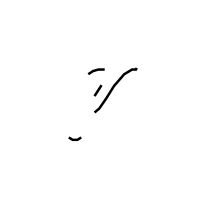

temperature=1.0


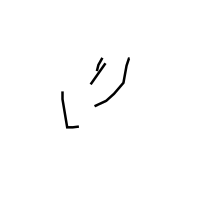

temperature=2.0


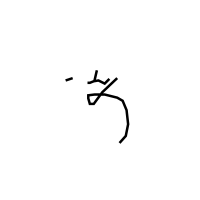

temperature=3.0


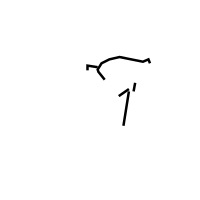

temperature=4.0


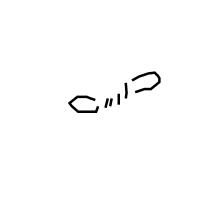

temperature=5.0


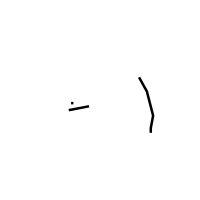

temperature=6.0


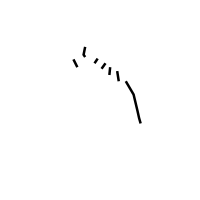

temperature=7.0


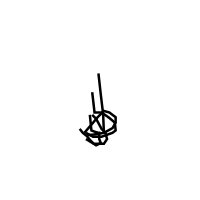

temperature=8.0


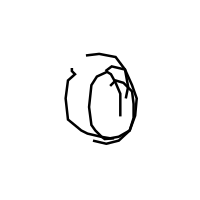

temperature=9.0


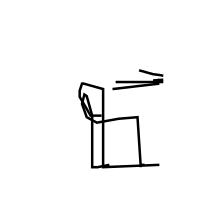

temperature=10.0


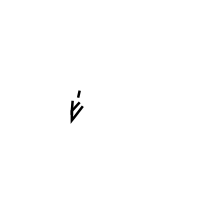

temperature=11.0


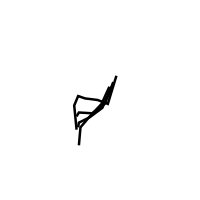

temperature=12.0


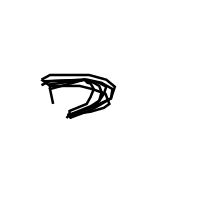

temperature=13.0


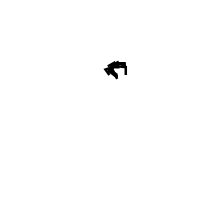

temperature=14.0


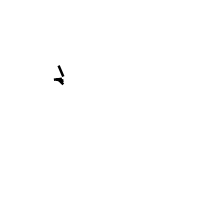

temperature=15.0


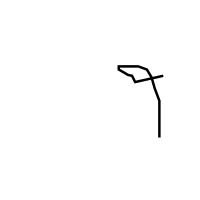

temperature=16.0


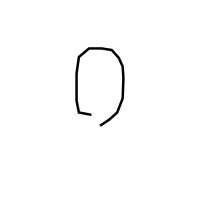

temperature=17.0


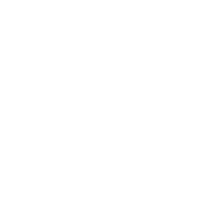

temperature=18.0


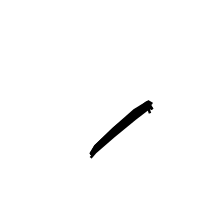

temperature=19.0


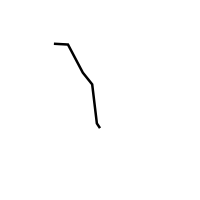

temperature=20.0


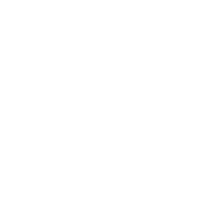

temperature=21.0


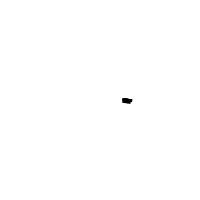

temperature=22.0


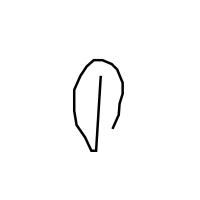

temperature=23.0


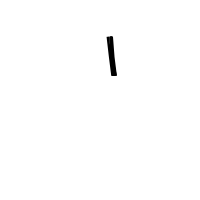

temperature=24.0


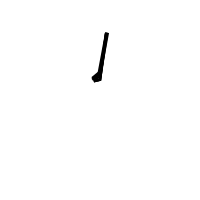

temperature=25.0


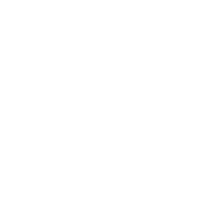

temperature=26.0


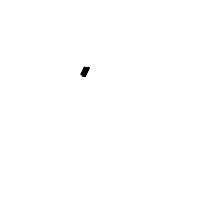

temperature=27.0


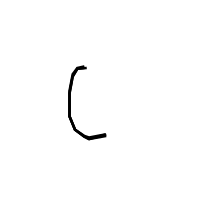

temperature=28.0


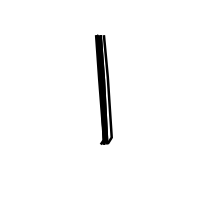

temperature=29.0


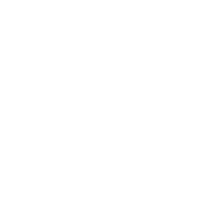

temperature=30.0


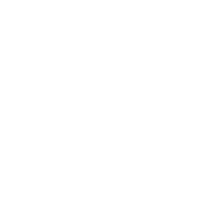

temperature=31.0


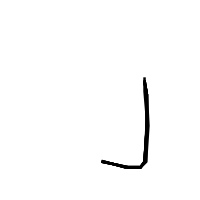

temperature=32.0


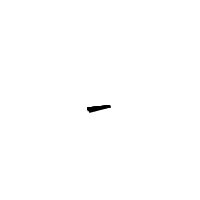

temperature=33.0


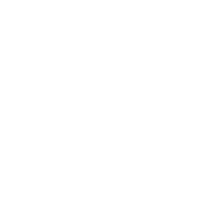

temperature=34.0


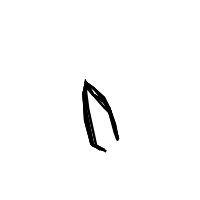

temperature=35.0


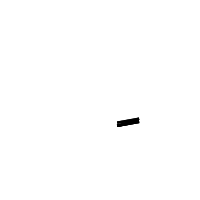

temperature=36.0


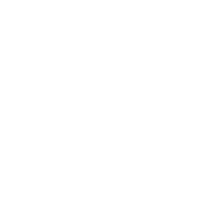

temperature=37.0


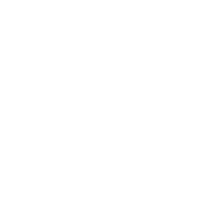

temperature=38.0


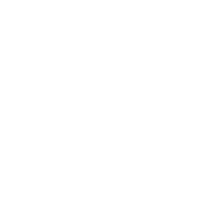

temperature=39.0


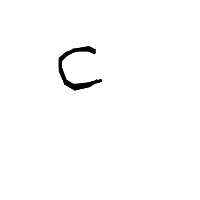

temperature=40.0


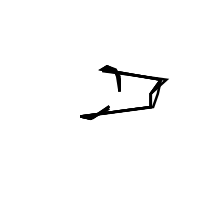

temperature=41.0


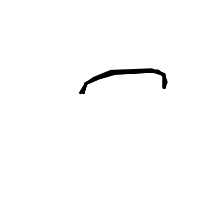

temperature=42.0


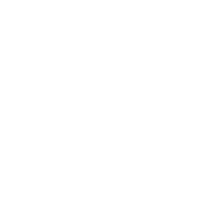

temperature=43.0


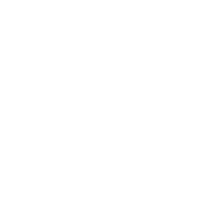

temperature=44.0


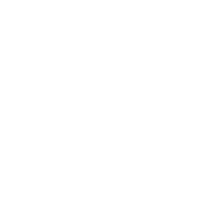

temperature=45.0


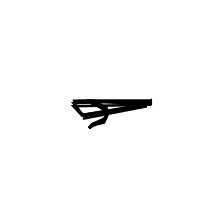

temperature=46.0


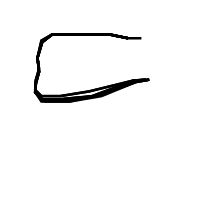

temperature=47.0


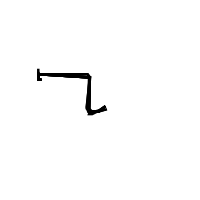

temperature=48.0


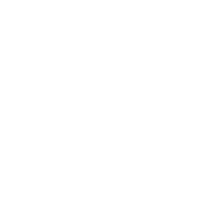

temperature=49.0


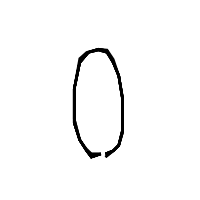

In [75]:
NUM_SAMPLES = 50
TEMPERATURE=5
for i in range(NUM_SAMPLES):
    temperature=(50/NUM_SAMPLES)*i
    print(f"{temperature=}")
    sample_unsymbol(with_points=False, with_handles=False, with_moves=False, temperature=temperature)

0.0
0.13333333333333333
0.26666666666666666
0.4
0.5333333333333333
0.6666666666666666
0.8
0.9333333333333333
1.0666666666666667
1.2
1.3333333333333333
1.4666666666666666
1.6
1.7333333333333334
1.8666666666666667
2.0
2.1333333333333333
2.2666666666666666
2.4
2.533333333333333
2.6666666666666665
2.8
2.933333333333333
3.0666666666666664
3.2
3.3333333333333335
3.466666666666667
3.6
3.7333333333333334
3.8666666666666667
4.0
4.133333333333333
4.266666666666667
4.4
4.533333333333333
4.666666666666667
4.8
4.933333333333334
5.066666666666666
5.2
5.333333333333333
5.466666666666667
5.6
5.733333333333333
5.866666666666666
6.0
6.133333333333333
6.266666666666667
6.4
6.533333333333333
6.666666666666667
6.8
6.933333333333334
7.066666666666666
7.2
7.333333333333333
7.466666666666667
7.6
7.733333333333333
7.866666666666666
8.0
8.133333333333333
8.266666666666666
8.4
8.533333333333333
8.666666666666666
8.8
8.933333333333334
9.066666666666666
9.2
9.333333333333334
9.466666666666667
9.6
9.733333333333333

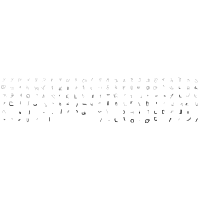

In [91]:
sample_all_unsymbols("/tmp/alluns.svg", num_symbols=150, temperatures=(0.0, 20.0) digits_in_row=24)

Now let's make a convenient grid display of all glyphs!

# Interpolation of font glyphs

Interpolations between randomly generated glyphs

In [52]:
z1, z2 = get_z(temperature=TEMPERATURE), get_z(temperature=TEMPERATURE)
interpolate(z1, z2, "9")

Interpolations between real fonts

In [54]:
label = "0"
#uni = dataset._label_to_uni(glyph2label.index(label))
id1, id2 = dataset.random_id(), dataset.random_id()
interpolate_icons(id1, id2, label)

In [ ]:
dataset.random_id()